In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rc('font',size = 14)
plt.rc('axes',labelsize = 14,titlesize = 14)
plt.rc('legend',fontsize = 14)
plt.rc('xtick',labelsize = 10)
plt.rc('ytick',labelsize = 10)

In [3]:
np.random.seed(42)

m = 100
X = 2 * np.random.rand(m,1)
y = 4 + 3* X +np.random.randn(m,1)

#rand və randn arasındakı fərq -> rand uniform tipli data yaradır randn normal distribution tipli bir sey

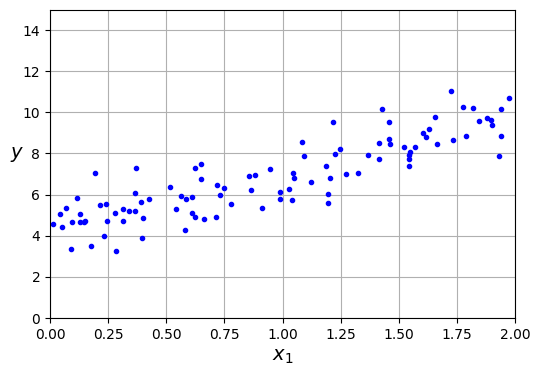

In [4]:
plt.figure(figsize = (6,4))
plt.plot(X,y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation = 0)
plt.axis([0,2,0,15])
plt.grid();

In [5]:
matrix_a = np.array([[1,2],[3,4]])
matrix_b = np.array([[5,6],[7,8]])
result = matrix_a @ matrix_b
result_1 = np.dot(matrix_a,matrix_b)

print('Matrix A:')
print(matrix_a)
print('Matrix B:')
print(matrix_b)
print('result of matris multiplication A @ B')
print(result_1)

Matrix A:
[[1 2]
 [3 4]]
Matrix B:
[[5 6]
 [7 8]]
result of matris multiplication A @ B
[[19 22]
 [43 50]]


In [6]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)                                             #wx + b de b olsun deye
theta_best = np.linalg.inv(X_b.T @ X_b)@ X_b.T @ y                   # X transpose times X and then inverse

In [7]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [8]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

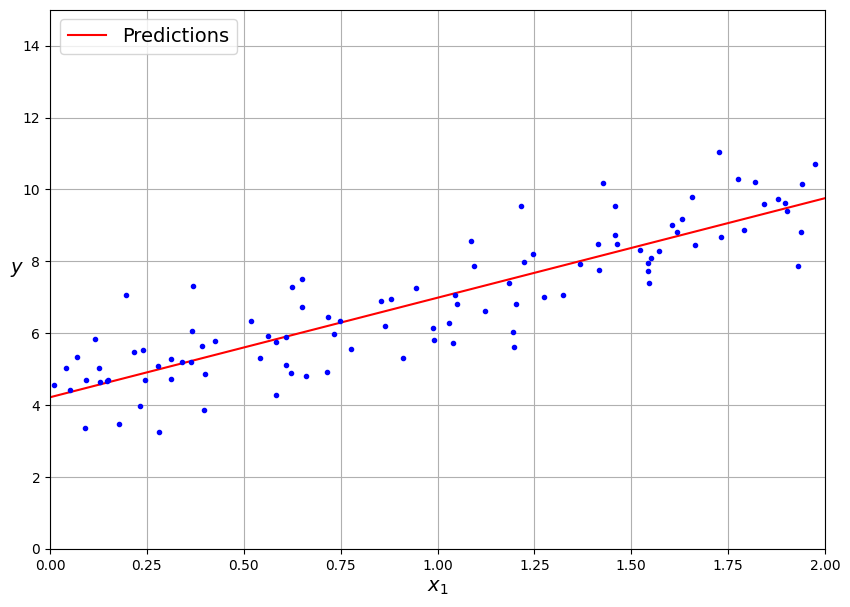

In [9]:
plt.figure(figsize = (10,7))
plt.plot(X_new,y_predict,'r-',label = 'Predictions')
plt.plot(X,y,'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation = 0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc = 'upper left')

plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_                  # intercept - b   , coefficient - w

(array([4.21509616]), array([[2.77011339]]))

In [12]:
eta = 0.1 #learning rate
n_epochs = 1000
m = len(X_b)     #number of instances

np.random.seed(42)
theta = np.random.randn(2,1)   #randomly initialize model parameters

for epoch in range(n_epochs):
  gradient = 1 / m * 2 * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradient


In [13]:
theta

array([[4.21509616],
       [2.77011339]])

stochastic gradient descend

In [15]:
np.random.seed(42)
eta = 0.1
m = len(X_b)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]      # : den sonrasi matrix etdiyine gore yaziriq
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi)
    theta = theta - eta * gradients

In [16]:
theta

array([[4.17686315],
       [2.85986577]])

In [21]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000,tol = 1e-5,penalty = None, eta0 = 0.01,     # tol --> tolerance penalty
                       n_iter_no_change = 100,random_state = 42)                  # 100 defe erzinde tol qeder deyismis dayanir

sgd_reg.fit(X, y.ravel())   #ravel reduces dimension to 1D

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [22]:
from math import ceil

n_epochs = 50
eta = 0.1
m = len(X_b)
minibatch_size = 20                    #1 destede 20 dene olsun
n_batches_per_epoch = ceil(m/minibatch_size)  #ceil bolende yuxariya yuvarlaqlasdiririq


np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for iteration in range(0,n_batches_per_epoch):
    idx = iteration * minibatch_size
    xi = X_b_shuffled[idx : idx + minibatch_size]
    yi = y_shuffled[idx : idx + minibatch_size]
    gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
    theta = theta - eta * gradients

In [23]:
theta

array([[4.22023943],
       [2.7704472 ]])

Polynomial Regression

In [24]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)

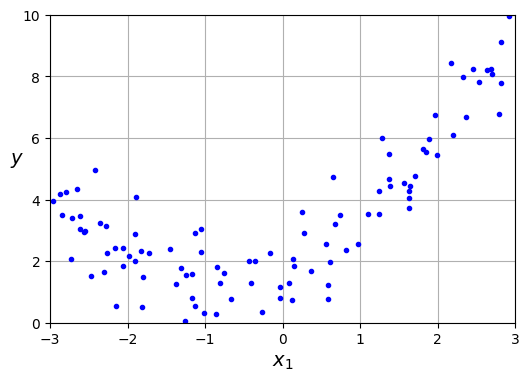

In [25]:
plt.figure(figsize = (6,4))
plt.plot(X,y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation = 0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

In [28]:
lin_reg.fit(X,y)

predictions =  lin_reg.predict([[-3],[3]])
predictions

array([[1.03315352],
       [6.09487734]])

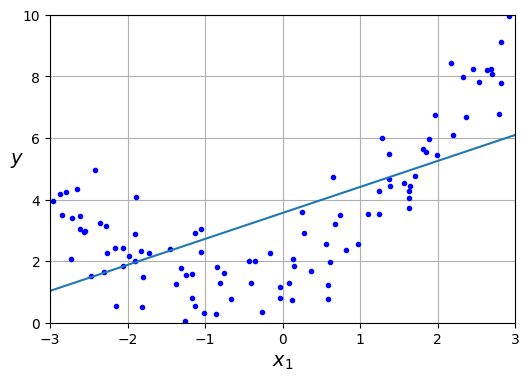

In [29]:
plt.figure(figsize = (6,4))
plt.plot(X,y,'b.')
plt.plot([-3,3],predictions)
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation = 0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures                #ax2 + bx + c

In [32]:
poly_features = PolynomialFeatures(degree = 2,include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [33]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [34]:
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [35]:
model = lin_reg.fit(X_poly,y)
poly_predict = model.predict

In [36]:
X.shape

(100, 1)

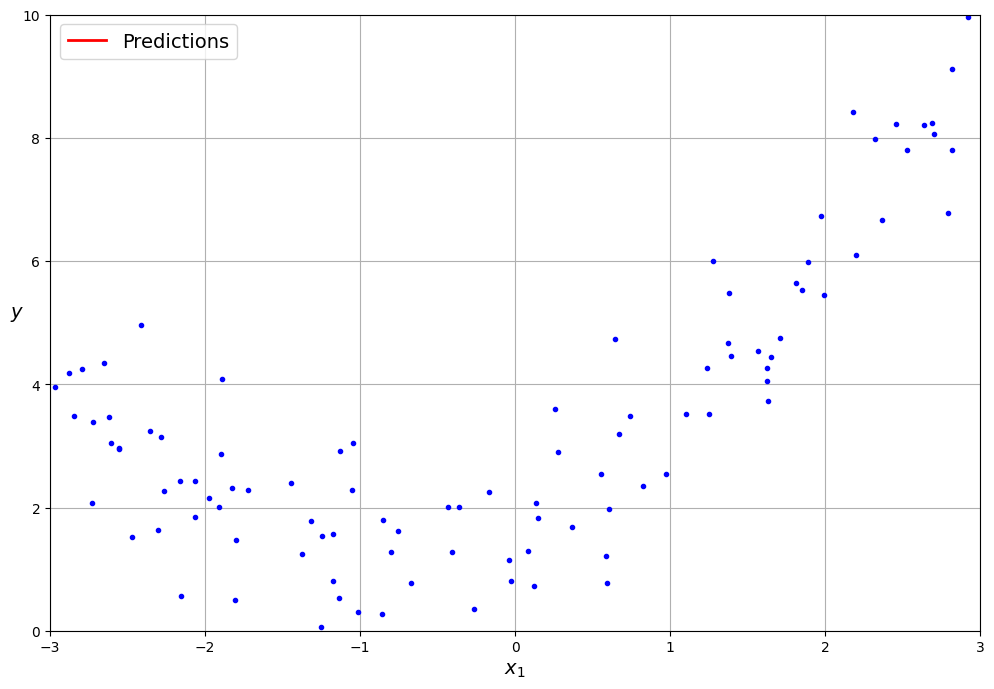

In [37]:
X_new = np.linspace(-3,-3,100).reshape(100,1)           #linspace -3 ve 3 arasinda 100 value yaratdi
X_new_poly = poly_features.transform(X_new)             # tekce trassform eledi ki,  oyrendiyu data uzerinden transform etsin
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize = (12,8))
plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r-',linewidth = 2,label = 'Predictions')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation = 0)
plt.legend(loc = 'upper left')
plt.axis([-3,3,0,10])
plt.grid()
plt.show()